# `Matplotlib annotations`


In [262]:
import pandas as pd
import duckdb as db

df = pd.read_csv('../data/1900-census-immigrant-pop-metro.csv')


In [263]:
df.columns

Index(['City', 'State', 'Error', 'Total foreign born', 'Africa',
       'Asia (except China, Japan, and India)', 'Atlantic Islands',
       'Australia', 'Austria', 'Belgium', 'Bohemia', 'Canada (English)',
       'Canada (French)', 'Central America', 'China', 'Cuba', 'Denmark',
       'England', 'Europe (not otherwise specified)', 'Finland', 'France',
       'Germany', 'Greece', 'Holland', 'Hungary', 'India', 'Ireland', 'Italy',
       'Japan', 'Luxemburg', 'Mexico', 'Norway',
       'Pacific Islands (except Phillipine Islands)', 'Poland (Austrian)',
       'Poland (German)', 'Poland (Russian)', 'Poland (unknown)', 'Portugal',
       'Roumania', 'Russia', 'Scotland', 'South America', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Wales',
       'West Indies (except Cuba and Puerto Rico)', 'Other countries',
       'Born at sea'],
      dtype='object')

In [264]:
columns = ["Sweden", "Norway", "Finland", "Denmark", "Total foreign born"]

df_nordic = df[columns]

df_nordic = df_nordic.fillna("0")

for column in columns:
    df[column] = df_nordic[column].str.replace(",", "").astype(int)

In [265]:
df_nordic.head(5)

,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,"7,127"
1,65,12,3,21,"17,718"
2,186,9,5,15,"30,216"
3,5,2,0,5,"2,991"
4,32,4,3,5,"3,301"


In [266]:
import duckdb

df_nordic = duckdb.query(
    """--sql
    WITH nordic AS (
        FROM df
            SELECT 
                state, 
                SUM("Total foreign born") AS "Total foreigners",
                SUM(sweden) AS Swedes,
                SUM(norway) AS Norwegians,
                SUM(denmark) AS Danish,
                SUM(finland) AS Finnish,
            GROUP BY
             state
    )
    FROM nordic n 
    SELECT *, n.swedes + n.norwegians + n.danish + n.finnish AS Nordic
    ORDER BY 
        nordic 
    DESC
"""
).df()

df_nordic.head()

,State,Total foreigners,Swedes,Norwegians,Danish,Finnish,Nordic
0,Illinois,627465.0,57158.0,22300.0,10374.0,447.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,2975.0,1101.0,56147.0
2,New York,1521931.0,29961.0,11752.0,6186.0,3764.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,1451.0,3154.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,4024.0,405.0,14948.0


# TODO for me 
- more visualizations on Nordic
- more visualizations on Total foreigners   
- ex bar charts for different states 
- compare nordic to toal foreigners

In [267]:
df_nordic.shape

(39, 7)

In [268]:
import matplotlib.pyplot as plt 



top_3_nordic = (
    df_nordic.drop(["Total foreigners", "Nordic"], axis=1).set_index("State").iloc[:3]
)
top_3_nordic

,Swedes,Norwegians,Danish,Finnish
State,,,,
Illinois,57158.0,22300.0,10374.0,447.0
Minnesota,34984.0,17087.0,2975.0,1101.0
New York,29961.0,11752.0,6186.0,3764.0


# Annotate


(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='State'>)

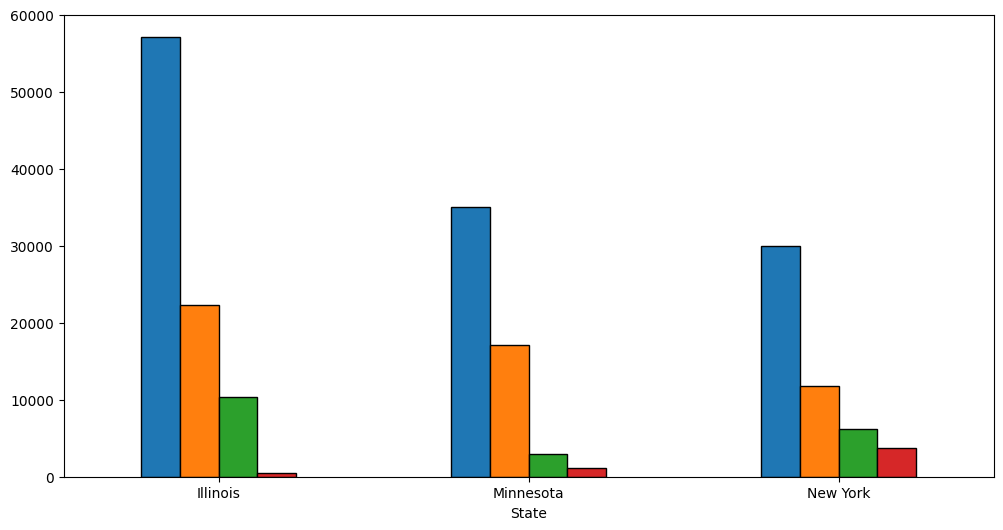

In [269]:
def nordic_plot():
    ax = top_3_nordic.plot(kind = "bar", figsize=(12,6), edgecolor= 'black')
    ax.set_xticklabels(top_3_nordic.index, rotation = 0)

    fig = ax.get_figure()
    ax.legend_.remove()
    return fig, ax

nordic_plot()

[<BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>]

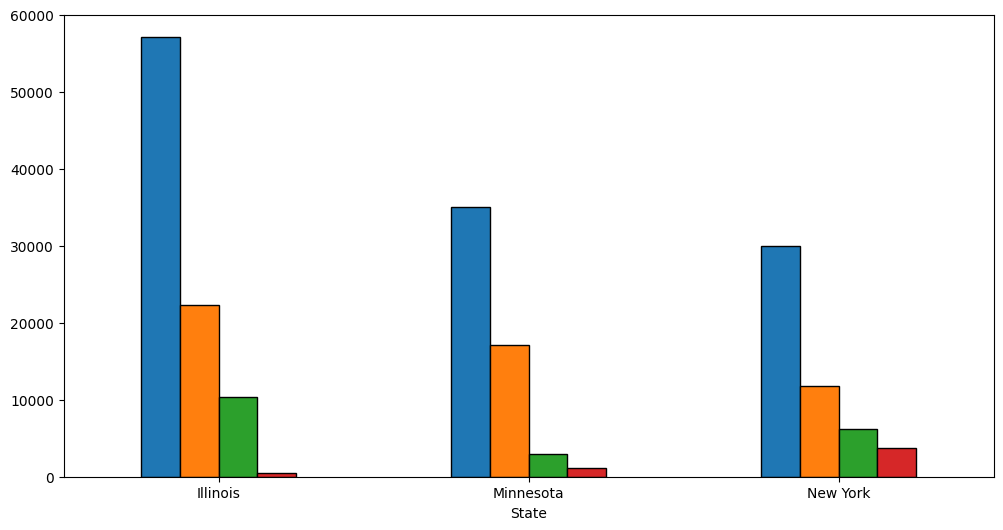

In [270]:
fig, ax = nordic_plot()

ax.containers

Text(0.8, 42000, 'Swedes')

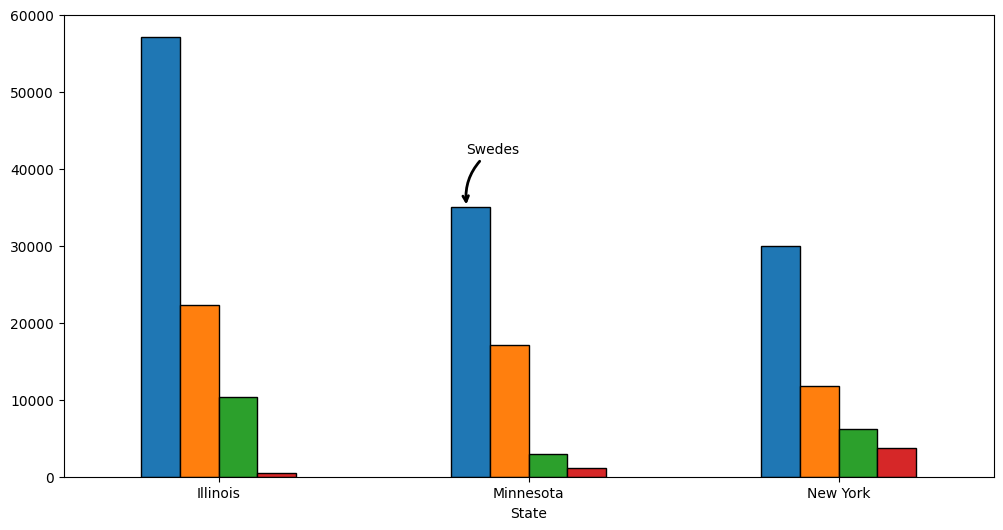

In [271]:
fig, ax = nordic_plot()

arrowprops = dict(arrowstyle="->", linewidth=2, connectionstyle="arc3, rad=.3")
ax.annotate(text="Swedes", xy=(0.8, 35000), arrowprops=arrowprops, xytext=(0.8, 42000))

In [272]:
# fig, ax = nordic_plot()

# # tuple unpacking of ax.containers that is a list of four BarContainers, which contains 3 Artists each
# swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers



# def annotate_nordic(bar_artist, text, x_offset, y_offset,rad=-0.3):

#     xy = (bar_artist.get_x(), bar_artist.get_height())

  
    

#     arrowprops = dict(arrowstyle="->", linewidth=2, connectionstyle=f"arc3, rad={rad}")
    
#     ax.annotate(
#         text=text,
#         xy=(xy[0] + 0.06, xy[1]),
#         arrowprops=arrowprops,
#         xytext=(xy[0] + x_offset, xy[1] + y_offset),
#     )




# annotate_nordic(swede_bars[1], "Swedes", -0.1, 7000, rad= -0.3)
# annotate_nordic(norwegian_bars[0], "Norwegians", 0.1, 5000,rad= 0.3)
# annotate_nordic(danish_bars[1]  , "Danes", 0.1, 5000,rad = 0.3)
# annotate_nordic(finnish_bars[2], "Finns",0.1, 5000, rad= 0.3)

# plt.title("Nordic Population By Country")
# plt.ylabel("Population")
# plt.tight_layout()
# plt.savefig('../plots/nordic_plot.png', dpi=300, bbox_inches='tight')
# plt.grid(True)
# plt.show()



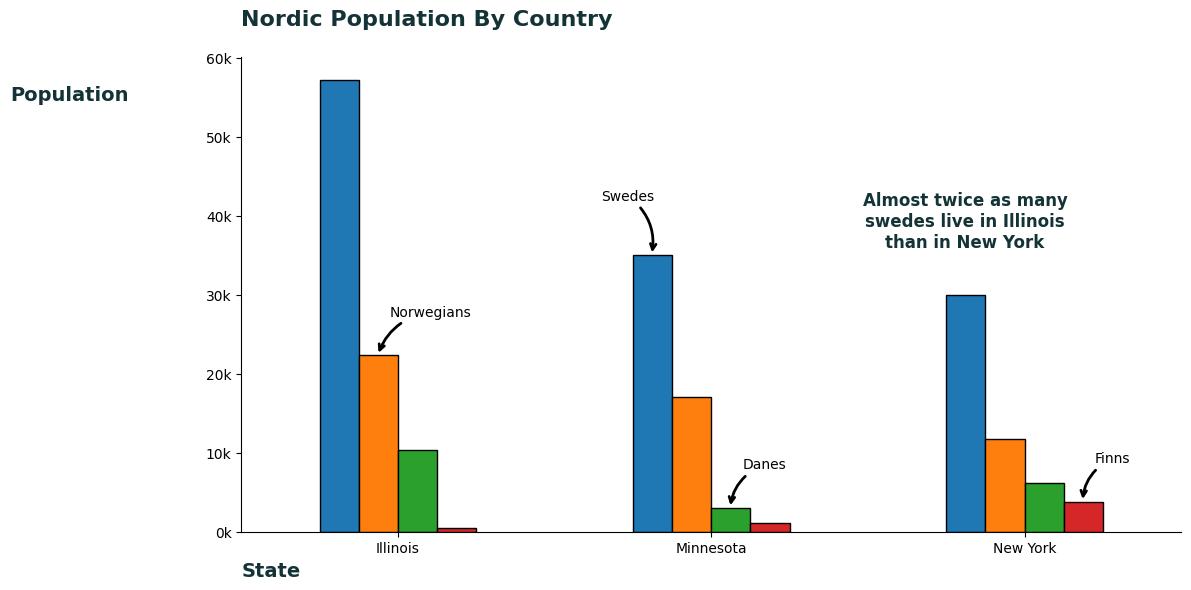

In [273]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_nordic_population():
    fig, ax = nordic_plot()

    swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers

    def annotate_nordic(bar_artist, text, x_offset, y_offset, rad=-0.3):
        xy = (bar_artist.get_x(), bar_artist.get_height())
        arrowprops = dict(arrowstyle="->", linewidth=2, connectionstyle=f"arc3, rad={rad}")
        ax.annotate(
            text=text,
            xy=(xy[0] + 0.06, xy[1]),
            arrowprops=arrowprops,
            xytext=(xy[0] + x_offset, xy[1] + y_offset),
        )

    annotate_nordic(swede_bars[1], "Swedes", -0.1, 7000, rad=-0.3)
    annotate_nordic(norwegian_bars[0], "Norwegians", 0.1, 5000, rad=0.3)
    annotate_nordic(danish_bars[1], "Danes", 0.1, 5000, rad=0.3)
    annotate_nordic(finnish_bars[2], "Finns", 0.1, 5000, rad=0.3)
    
    
    ax.spines[["top", "right"]].set_visible(False)  
    ax.set_title("Nordic Population By Country",
                 loc='left',
                 color = '#133337',
                 size = 16,
                 fontweight = 'bold',
                 x = 0.0,
                 y= 1.05,)
    
    ax.set_ylabel("Population",
                  color = '#133337',
                  size = 14,
                  fontweight = 'bold',
                  loc = 'top',
                  rotation = 0)
    ax.yaxis.set_label_coords(-0.12, .9)
    
    ax.set_xlabel('State',
                  loc='left',
                  color = '#133337',
                  size = 14,
                  fontweight = 'bold',
                  )
    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(10000))
   
 
 

# Formatera y-axeln för att visa 'k'
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x * 1e-3)}k'))
    ax.annotate(text ="Almost twice as many\nswedes live in Illinois\nthan in New York",
                xy=(0.77, 0.6), xycoords='axes fraction',
                ha='center', fontsize=12, color = '#133337', fontweight = 'bold')

    plt.tight_layout()
    plt.savefig('../plots/nordic_plot.png',dpi = 300)
    plt.show()

plot_nordic_population()    


In [274]:
swede_color = '#1f77b4'
other_color = '#ff7f0e'

swede_color = '#1f77b4'
faded_color = '#d3d3d3'

colors = [swede_color,other_color, faded_color]

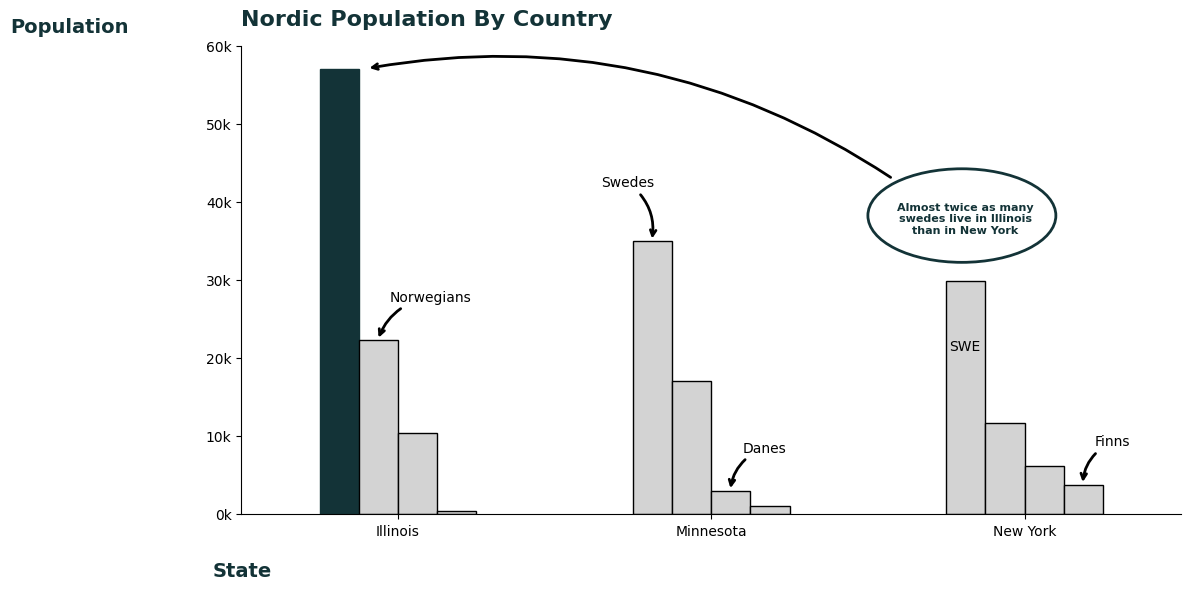

In [293]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Ellipse

def plot_nordic_population():
    fig, ax = nordic_plot()  # Du behöver ha denna funktion definierad

    # Extrahera bar-grupperna
    swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers

    # Funktion för att rita pilar + text
    def annotate_nordic(bar_artist, text, x_offset, y_offset, rad=-0.3):
        xy = (bar_artist.get_x(), bar_artist.get_height())
        arrowprops = dict(arrowstyle="->", linewidth=2, connectionstyle=f"arc3,rad={rad}")
        ax.annotate(
            text=text,
            xy=(xy[0] + 0.06, xy[1]),
            xytext=(xy[0] + x_offset, xy[1] + y_offset),
            arrowprops=arrowprops,
        )

    # Använd annotation-funktionen
    annotate_nordic(swede_bars[1], "Swedes", -0.1, 7000)
    annotate_nordic(norwegian_bars[0], "Norwegians", 0.1, 5000, rad=0.3)
    annotate_nordic(danish_bars[1], "Danes", 0.1, 5000, rad=0.3)
    annotate_nordic(finnish_bars[2], "Finns", 0.1, 5000, rad=0.3)

    # Stil och formatering
    ax.spines[["top", "right"]].set_visible(False)

    # Titel (vänsterjusterad)
    ax.set_title(
        "Nordic Population By Country",
        fontsize=16,
        fontweight='bold',
        color='#133337',
        loc='left',
        pad=15
    )

    # Y-axel
    ax.set_ylabel(
        "Population",
        fontsize=14,
        fontweight='bold',
        color='#133337',
        rotation=0,
        loc='top',
        labelpad=20
    )
    ax.yaxis.set_label_coords(-0.12, 1.02)  # Flytta y-label upp och till vänster

    # X-axel
    ax.set_xlabel(
        "State",
        fontsize=14,
        fontweight='bold',
        color='#133337',
        loc='left',
        labelpad=10
    )
    ax.xaxis.set_label_coords(-0.03, -0.1)  # Flytta ner x-label lite

    # Y-ticks varje 10k
    ax.yaxis.set_major_locator(ticker.MultipleLocator(10000))

    # Formatera y-ticks till 'k'
    ax.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, pos: f'{int(x * 1e-3)}k')
    )

    # Extra annotation i grafen
    ax.annotate(
        "Almost twice as many\nswedes live in Illinois\nthan in New York",
        xy=(0.77, 0.6),
        xycoords='axes fraction',
        ha='center',
        fontsize=8,
        color='#133337',
        fontweight='bold'
    )
  

    # Lägg till en oval (ellipse) i ploten
    ellipse = Ellipse(
    xy=(1.8, 38300),       # mittpunkt (x, y) — anpassa efter din graf
    width=0.6,             # bredden på ovalen
    height=12000,
    edgecolor='#133337',  # kantfärg
    facecolor = 'none' ,# höjden på ovalen,      # kantfärg,      # fyllning (ändra till t.ex. 'lightblue' om du vill fylla)
    linewidth=2
)

# Lägg till ovalen till axeln
    ax.add_patch(ellipse)
    ax.annotate(arrowprops=dict(arrowstyle="->", linewidth=2, connectionstyle="arc3, rad=.2"),
                xy=(-0.1, 57158), xytext=(1.58, 43000), text=None, fontsize=10,
                color='#133337', fontweight='bold')
    
    for bar in swede_bars:
        bar.set_color('lightgray')
    for bar in norwegian_bars:
        bar.set_color('lightgray')
    for bar in danish_bars:
        bar.set_color('lightgray')
    for bar in finnish_bars:
        bar.set_color('lightgray')
        
    # Sätt edgecolor till svart för alla staplar
    for container in [swede_bars, norwegian_bars, danish_bars, finnish_bars]:
        for bar in container:
            bar.set_edgecolor('black')
    n = ax.annotate(text = "SWE" , xy=(0.753, 0.35), xycoords=('axes fraction'))

# Highlighta bara Illinois (första stapeln i swede_bars)
    illinois_bar = swede_bars[0]
    illinois_bar.set_color('#133337')  # Mörk färg för att sticka ut

    # Layout och spara
    plt.tight_layout()
    plt.savefig('../plots/nordic_plot.png', dpi=72)
    plt.show()

plot_nordic_population()